In [1]:
import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import svm
from scipy import io
for data_name in ["mnist", "spam", "cifar10"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
    print(data_name)
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)

mnist

loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)
spam

loaded spam data!
test_data (5857, 45)
training_data (5172, 45)
training_labels (5172, 1)
cifar10

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


# Part 2 Data Partitioning

## a) MNIST Data

In [2]:
mnist=io.loadmat('data/mnist_data.mat')

In [3]:
mnist

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Dec 18 20:13:05 2018',
 '__version__': '1.0',
 'test_data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'training_data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'training_labels': array([[5],
        [0],
        [4],
        ..., 
        [5],
        [6],
        [8]], dtype=uint8)}

In [4]:
import pandas as pd
mnist_training=pd.DataFrame(mnist['training_data'])
mnist_training['training_labels']=mnist['training_labels']
mnist_training.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,training_labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [5]:
mnist_train=mnist_training.sample(frac=5/6,random_state=200) #random state is a seed value
mnist_validation=mnist_training.drop(mnist_train.index)

In [6]:
mnist_train.shape,mnist_validation.shape

((50000, 785), (10000, 785))

## b) Spam Data

In [7]:
spam=io.loadmat('data/spam_data.mat')

In [8]:
spam

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sat Jan 25 23:02:30 2020',
 '__version__': '1.0',
 'test_data': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  1.,  0.,  1.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  1.],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 'training_data': array([[ 0.,  0.,  0., ...,  1.,  0.,  1.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  1.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.]]),
 'training_labels': array([[1],
        [1],
        [1],
        ..., 
        [0],
        [0],
        [0]])}

In [9]:
spam_training=pd.DataFrame(spam['training_data'])
spam_training['training_labels']=spam['training_labels']
spam_training.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,training_labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [10]:
spam_train=spam_training.sample(frac=0.8,random_state=200) #random state is a seed value
spam_validation=spam_training.drop(spam_train.index)

In [11]:
spam_train.shape,spam_validation.shape

((4138, 46), (1034, 46))

## c) CIFAR-10 Data

In [18]:
cifar10=io.loadmat('data/cifar10_data.mat')

In [19]:
cifar10

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Dec 18 20:11:26 2018',
 '__version__': '1.0',
 'test_data': array([[158, 159, 165, ..., 124, 129, 110],
        [235, 231, 232, ..., 178, 191, 199],
        [158, 158, 139, ...,   8,   3,   7],
        ..., 
        [ 20,  19,  15, ...,  50,  53,  47],
        [ 25,  15,  23, ...,  80,  81,  80],
        [ 73,  98,  99, ...,  94,  58,  26]], dtype=uint8),
 'training_data': array([[ 59,  43,  50, ..., 140,  84,  72],
        [154, 126, 105, ..., 139, 142, 144],
        [255, 253, 253, ...,  83,  83,  84],
        ..., 
        [ 35,  40,  42, ...,  77,  66,  50],
        [189, 186, 185, ..., 169, 171, 171],
        [229, 236, 234, ..., 173, 162, 161]], dtype=uint8),
 'training_labels': array([[6],
        [9],
        [9],
        ..., 
        [9],
        [1],
        [1]])}

In [20]:
cifar10_training=pd.DataFrame(cifar10['training_data'])
cifar10_training['training_labels']=cifar10['training_labels']
cifar10_training.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,training_labels
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1


In [21]:
cifar10_train=cifar10_training.sample(frac=0.9,random_state=200) #random state is a seed value
cifar10_validation=cifar10_training.drop(cifar10_train.index)

In [22]:
cifar10_train.shape,cifar10_validation.shape

((45000, 3073), (5000, 3073))

# Part3 SVM

## a) MNIST Data

In [17]:
mnist_train=mnist_train.reset_index(drop=True)
mnist_validation=mnist_validation.reset_index(drop=True)
mnist_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,training_labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [18]:
mnist_validation.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,training_labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [29]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
score=[]
for i in [100, 200, 500, 1000, 2000, 5000, 10000]:
    mnist_classifier=LinearSVC()
    mnist_classifier.fit(X=mnist_train.iloc[0:i,0:784],y=mnist_train.iloc[0:i,784])
    pred=mnist_classifier.predict(X=mnist_validation.drop(['training_labels'],axis=1))
    actual=mnist_validation['training_labels']
    score+=[accuracy_score(pred,actual)]
training_size=[100, 200, 500, 1000, 2000, 5000, 10000]
accuracy=pd.DataFrame(training_size,columns=['training size'])
accuracy['score']=score  

In [30]:
accuracy['error rate']=1-accuracy['score']
accuracy

,training size,score,error rate
0,100,0.7158,0.2842
1,200,0.7504,0.2496
2,500,0.7913,0.2087
3,1000,0.8157,0.1843
4,2000,0.8178,0.1822
5,5000,0.8353,0.1647
6,10000,0.8537,0.1463


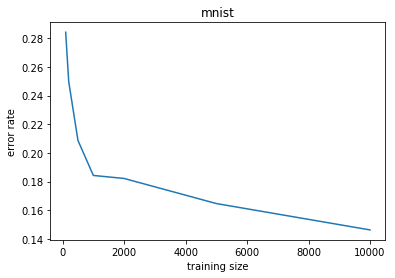

In [31]:
import matplotlib.pyplot as plt
plt.plot(accuracy['training size'],accuracy['error rate'])
plt.xlabel('training size')
plt.ylabel('error rate')
plt.title('mnist')
plt.show()

## b) Spam Data

In [14]:
spam_train=spam_train.reset_index(drop=True)
spam_validation=spam_validation.reset_index(drop=True)
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
score=[]
for i in [100, 200, 500, 1000, 2000, 4138]:
    spam_classifier=LinearSVC()
    spam_classifier.fit(X=spam_train.iloc[0:i,0:45],y=spam_train.iloc[0:i,45])
    pred=spam_classifier.predict(X=spam_validation.drop(['training_labels'],axis=1))
    actual=spam_validation['training_labels']
    score+=[accuracy_score(pred,actual)]
training_size=[100, 200, 500, 1000, 2000, 4138]
spam_accuracy=pd.DataFrame(training_size,columns=['training size'])
spam_accuracy['score']=score  

In [15]:
spam_accuracy['error rate']=1-spam_accuracy['score']
spam_accuracy

,training size,score,error rate
0,100,0.813346,0.186654
1,200,0.823017,0.176983
2,500,0.835590,0.164410
3,1000,0.850097,0.149903
4,2000,0.862669,0.137331
5,4138,0.852031,0.147969


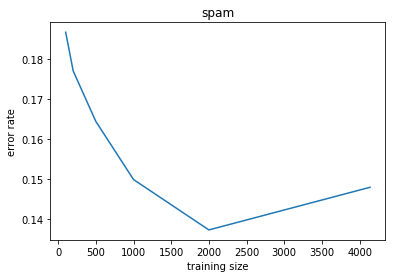

In [32]:
plt.plot(spam_accuracy['training size'],spam_accuracy['error rate'])
plt.xlabel('training size')
plt.ylabel('error rate')
plt.title('spam')
plt.show()

## c) CIFAR-10 Data

In [24]:
cifar10_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,training_labels
20518,94,85,93,95,95,91,88,87,87,82,...,55,65,63,54,68,73,62,56,58,9
20570,40,43,53,55,54,66,86,82,88,111,...,142,145,141,145,126,113,111,120,133,2
38530,216,215,217,219,223,227,229,230,233,234,...,112,112,108,103,106,104,104,102,102,9
39945,131,136,128,105,136,145,123,104,110,114,...,90,88,86,86,84,84,83,82,81,4
1713,22,21,21,23,22,19,20,21,16,14,...,240,240,239,233,233,233,228,227,224,5


In [25]:
cifar10_train=cifar10_train.reset_index(drop=True)
cifar10_validation=cifar10_validation.reset_index(drop=True)
from sklearn.svm import SVC
score=[]
for i in [100, 200, 500, 1000, 2000, 5000]:
    cifar10_classifier=SVC(kernel='linear')
    cifar10_classifier.fit(X=cifar10_train.iloc[0:i,0:3072],y=cifar10_train.iloc[0:i,3072])
    pred=cifar10_classifier.predict(X=cifar10_validation.drop(['training_labels'],axis=1))
    actual=cifar10_validation['training_labels']
    score+=[accuracy_score(pred,actual)]
training_size=[100, 200, 500, 1000, 2000, 5000]
cifar10_accuracy=pd.DataFrame(training_size,columns=['training size'])
cifar10_accuracy['score']=score  

In [26]:
cifar10_accuracy['error rate']=1-cifar10_accuracy['score']
cifar10_accuracy

,training size,score,error rate
0,100,0.2380,0.7620
1,200,0.2342,0.7658
2,500,0.2748,0.7252
3,1000,0.2986,0.7014
4,2000,0.2840,0.7160
5,5000,0.3018,0.6982


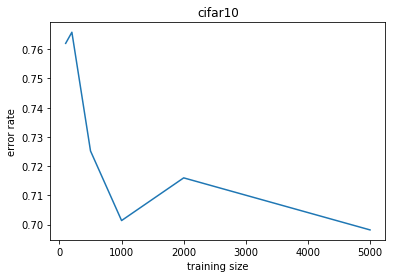

In [27]:
plt.plot(cifar10_accuracy['training size'],cifar10_accuracy['error rate'])
plt.xlabel('training size')
plt.ylabel('error rate')
plt.title('cifar10')
plt.show()

# Part4 Hyperparameter Tuning

In [26]:
#rough try
from sklearn.svm import SVC
score=[]
for i in [10**(-9),10**(-8),10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1)]:
    mnist_classifier=mnist_classifier=LinearSVC(C=i)
    mnist_classifier.fit(X=mnist_train.iloc[0:10000,0:784],y=mnist_train.iloc[0:10000,784])
    pred=mnist_classifier.predict(X=mnist_validation.drop(['training_labels'],axis=1))
    actual=mnist_validation['training_labels']
    score+=[accuracy_score(pred,actual)]
    print(score)
#c=[10**(-10),10**(-9),10**(-8),10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1)]
#accuracy_c=pd.DataFrame(c,columns=['c'])
#accuracy_c['score']=score  

[0.82950000000000002]
[0.82950000000000002, 0.87909999999999999]
[0.82950000000000002, 0.87909999999999999, 0.89239999999999997]
[0.82950000000000002, 0.87909999999999999, 0.89239999999999997, 0.89690000000000003]
[0.82950000000000002, 0.87909999999999999, 0.89239999999999997, 0.89690000000000003, 0.88770000000000004]
[0.82950000000000002, 0.87909999999999999, 0.89239999999999997, 0.89690000000000003, 0.88770000000000004, 0.87109999999999999]
[0.82950000000000002, 0.87909999999999999, 0.89239999999999997, 0.89690000000000003, 0.88770000000000004, 0.87109999999999999, 0.85850000000000004]
[0.82950000000000002, 0.87909999999999999, 0.89239999999999997, 0.89690000000000003, 0.88770000000000004, 0.87109999999999999, 0.85850000000000004, 0.84860000000000002]
[0.82950000000000002, 0.87909999999999999, 0.89239999999999997, 0.89690000000000003, 0.88770000000000004, 0.87109999999999999, 0.85850000000000004, 0.84860000000000002, 0.85940000000000005]


In [27]:
#try the range from 10**(-7),10**(-5)
from sklearn.svm import SVC
score=[]
for i in np.linspace(10**(-7),10**(-5),10):
    mnist_classifier=mnist_classifier=LinearSVC(C=i)
    mnist_classifier.fit(X=mnist_train.iloc[0:10000,0:784],y=mnist_train.iloc[0:10000,784])
    pred=mnist_classifier.predict(X=mnist_validation.drop(['training_labels'],axis=1))
    actual=mnist_validation['training_labels']
    score+=[accuracy_score(pred,actual)]
    print(score)

[0.89239999999999997]
[0.89239999999999997, 0.89690000000000003]
[0.89239999999999997, 0.89690000000000003, 0.89490000000000003]
[0.89239999999999997, 0.89690000000000003, 0.89490000000000003, 0.89190000000000003]
[0.89239999999999997, 0.89690000000000003, 0.89490000000000003, 0.89190000000000003, 0.89100000000000001]
[0.89239999999999997, 0.89690000000000003, 0.89490000000000003, 0.89190000000000003, 0.89100000000000001, 0.88949999999999996]
[0.89239999999999997, 0.89690000000000003, 0.89490000000000003, 0.89190000000000003, 0.89100000000000001, 0.88949999999999996, 0.88919999999999999]
[0.89239999999999997, 0.89690000000000003, 0.89490000000000003, 0.89190000000000003, 0.89100000000000001, 0.88949999999999996, 0.88919999999999999, 0.8881]
[0.89239999999999997, 0.89690000000000003, 0.89490000000000003, 0.89190000000000003, 0.89100000000000001, 0.88949999999999996, 0.88919999999999999, 0.8881, 0.8881]
[0.89239999999999997, 0.89690000000000003, 0.89490000000000003, 0.89190000000000003, 

In [35]:
c=np.linspace(10**(-7),10**(-5),10)
accuracy_c=pd.DataFrame(c,columns=['c'])
accuracy_c['score']=score  
accuracy_c

,c,score
0,1.000000e-07,0.8924
1,1.200000e-06,0.8969
2,2.300000e-06,0.8949
3,3.400000e-06,0.8919
4,4.500000e-06,0.8910
5,5.600000e-06,0.8895
6,6.700000e-06,0.8892
7,7.800000e-06,0.8881
8,8.900000e-06,0.8881
9,1.000000e-05,0.8877


In [36]:
print('best c is '+str(1.200000e-06))

best c is 1.2e-06


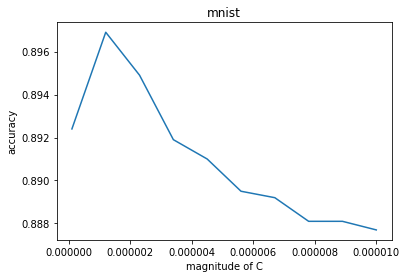

In [28]:
plt.plot(np.linspace(10**(-7),10**(-5),10),score)
plt.xlabel('magnitude of C')
plt.ylabel('accuracy')
plt.title('mnist')
plt.show()

# Part 5 CV

In [82]:
#rough try
shuffled = spam_training.sample(frac=1)
set1,set2,set3,set4,set5 = np.array_split(shuffled, 5) 
cv_accuracy=[]
for c in [10**(-9),10**(-8),10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7),10**(8),10**(9)]:
    accuracy=[]
    for i in [set1,set2,set3,set4,set5]:
        training=spam_training.drop(i.index)
        spam_classifier=LinearSVC(C=c)
        spam_classifier.fit(X=training.iloc[:,0:45],y=training.iloc[:,45])
        pred=spam_classifier.predict(X=i.drop(['training_labels'],axis=1))
        actual=i['training_labels']
        accuracy+=[accuracy_score(pred,actual)]
    cv_accuracy+=[np.average(accuracy)]
    print(c,cv_accuracy[-1])

1e-09 0.746711892281
1e-08 0.746711892281
1e-07 0.748645006961
1e-06 0.752898457283
1e-05 0.759472430129
0.0001 0.761793513301
0.001 0.776101626814
0.01 0.797176015474
0.1 0.802976667695
1 0.808004186173
10 0.811868920472
100 0.808006055
1000 0.773962754277
10000 0.687944383708
100000 0.736252814921
1000000 0.791757164616
10000000 0.78693166634
100000000 0.707683121689
1000000000 0.722953307357


In [84]:
# try range from 1,100
cv_accuracy=[]
for c in np.linspace(1,100,10):
    accuracy=[]
    for i in [set1,set2,set3,set4,set5]:
        training=spam_training.drop(i.index)
        spam_classifier=LinearSVC(C=c)
        spam_classifier.fit(X=training.iloc[:,0:45],y=training.iloc[:,45])
        pred=spam_classifier.predict(X=i.drop(['training_labels'],axis=1))
        actual=i['training_labels']
        accuracy+=[accuracy_score(pred,actual)]
    cv_accuracy+=[np.average(accuracy)]
    print(c,cv_accuracy[-1])

1.0 0.805489679403
12.0 0.811291639802
23.0 0.809743690373
34.0 0.811869107355
45.0 0.812063465366
56.0 0.811292947981
67.0 0.816125360917
78.0 0.809942907334
89.0 0.811675123109
100.0 0.804333809884


In [85]:
c=np.linspace(1,100,10)
spam_cv=pd.DataFrame(c,columns=['c'])
spam_cv['cv accuracy']=cv_accuracy 
spam_cv
#best c is 67

,c,cv accuracy
0,1.0,0.805490
1,12.0,0.811292
2,23.0,0.809744
3,34.0,0.811869
4,45.0,0.812063
5,56.0,0.811293
6,67.0,0.816125
7,78.0,0.809943
8,89.0,0.811675
9,100.0,0.804334


# Part 6 Kaggle

# a) MNIST

In [7]:
# I try to use polynomial kernel and found out polynomial kernel has higher accuracy when train with 6000 data points.
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
mnist_classifier=SVC(kernel='poly')
mnist_classifier.fit(X=mnist_train.iloc[0:6000,0:784],y=mnist_train.iloc[0:6000,784])
pred=mnist_classifier.predict(X=mnist_validation.drop(['training_labels'],axis=1))
actual=mnist_validation['training_labels']
accuracy_score(pred,actual)

0.94220000000000004

In [33]:
mnist_classifier=SVC(kernel='linear')
mnist_classifier.fit(X=mnist_train.iloc[0:6000,0:784],y=mnist_train.iloc[0:6000,784])
pred=mnist_classifier.predict(X=mnist_validation.drop(['training_labels'],axis=1))
actual=mnist_validation['training_labels']
accuracy_score(pred,actual)

0.90539999999999998

In [ ]:
## Try to tune C using poly Kernel, i was only able to run first iteration because of the huge time cost, but it can 
## shown here polynomial kernel SVC has pretty good accuracy(0.98). 

shuffled = mnist_training.sample(frac=0.1)
set1,set2,set3,set4,set5 = np.array_split(shuffled, 5) 
cv_accuracy=[]
for c in [10**(-9),10**(-7),10**(-5),10**(-3),10**(-1),10**(1),10**(3),10**(5),10**(7),10**(9)]:
    accuracy=[]
    for i in [set1,set2,set3,set4,set5]:
        training=mnist_training.drop(i.index)
        mnist_classifier=SVC(kernel='poly',C=c)
        mnist_classifier.fit(X=training.iloc[:,0:784],y=training.iloc[:,784])
        pred=mnist_classifier.predict(X=i.drop(['training_labels'],axis=1))
        actual=i['training_labels']
        accuracy+=[accuracy_score(pred,actual)]
    cv_accuracy+=[np.average(accuracy)]
    print(c,cv_accuracy[-1])

1e-09 0.981166666667


In [ ]:
## tunning C using linear kernel, but tend to have lower accuracy than poly kernel, so I still use poly kernel to make
## final predictions.
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
shuffled = mnist_training.sample(frac=1)
set1,set2,set3,set4,set5 = np.array_split(shuffled, 5) 
cv_accuracy=[]
for c in [10**(-9),10**(-8),10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7),10**(8),10**(9)]:
    accuracy=[]
    for i in [set1,set2,set3,set4,set5]:
        training=mnist_training.drop(i.index)
        mnist_classifier=LinearSVC(C=c)
        mnist_classifier.fit(X=training.iloc[:,0:784],y=training.iloc[:,784])
        pred=mnist_classifier.predict(X=i.drop(['training_labels'],axis=1))
        actual=i['training_labels']
        accuracy+=[accuracy_score(pred,actual)]
    cv_accuracy+=[np.average(accuracy)]
    print(c,cv_accuracy[-1])

1e-09 0.869433333333
1e-08 0.896483333333
1e-07 0.90765
1e-06 0.909466666667


In [89]:
best_c=accuracy_c['c'][1]
best_c

1.1999999999999999e-06

In [8]:
## Finally I decide to use polynomial kernel SVC
mnist_classifier=SVC(kernel='poly')
mnist_classifier.fit(X=mnist_training.iloc[:,0:784],y=mnist_training.iloc[:,784])
pred=mnist_classifier.predict(X=pd.DataFrame(mnist['test_data']))

In [9]:
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission.csv', index_label='Id')

In [10]:
results_to_csv(pred)

## b) Spam Data

In [2]:
spam=io.loadmat('data/spam_data.mat')
spam

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sat Jan 25 23:02:30 2020',
 '__version__': '1.0',
 'test_data': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  1.,  0.,  1.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  1.],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 'training_data': array([[ 0.,  0.,  0., ...,  1.,  0.,  1.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  1.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.]]),
 'training_labels': array([[1],
        [1],
        [1],
        ..., 
        [0],
        [0],
        [0]])}

In [3]:
spam_training=pd.DataFrame(spam['training_data'])
spam_training['training_labels']=spam['training_labels']
spam_training.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,training_labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
## I first try to find best C value that maximizes accuracy using CV
from sklearn.metrics import accuracy_score
shuffled = spam_training.sample(frac=1)
set1,set2,set3,set4,set5 = np.array_split(shuffled, 5) 
cv_accuracy=[]
for c in [10**(-9),10**(-8),10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7),10**(8),10**(9)]:
    accuracy=[]
    for i in [set1,set2,set3,set4,set5]:
        training=spam_training.drop(i.index)
        spam_classifier=LinearSVC(C=c)
        spam_classifier.fit(X=training.iloc[:,0:45],y=training.iloc[:,45])
        pred=spam_classifier.predict(X=i.drop(['training_labels'],axis=1))
        actual=i['training_labels']
        accuracy+=[accuracy_score(pred,actual)]
    cv_accuracy+=[np.average(accuracy)]
    print(c,cv_accuracy[-1])

1e-09 0.747290294247
1e-08 0.747483530962
1e-07 0.748063801755
1e-06 0.753863145797
1e-05 0.76546388959
0.0001 0.772229043441
0.001 0.797170969641
0.01 0.839323484615
0.1 0.848219288164
1 0.849186779918
10 0.851700352274
100 0.851121950308
1000 0.78498546987
10000 0.787329539614
100000 0.791368261711
1000000 0.806457731805
10000000 0.764715050598
100000000 0.802393033013
1000000000 0.729748736206


In [8]:
## CV to tune C: try value between 1~100
cv_accuracy=[]
for c in np.linspace(1,100,20):
    accuracy=[]
    for i in [set1,set2,set3,set4,set5]:
        training=spam_training.drop(i.index)
        spam_classifier=LinearSVC(C=c)
        spam_classifier.fit(X=training.iloc[:,0:45],y=training.iloc[:,45])
        pred=spam_classifier.predict(X=i.drop(['training_labels'],axis=1))
        actual=i['training_labels']
        accuracy+=[accuracy_score(pred,actual)]
    cv_accuracy+=[np.average(accuracy)]
    print(c,cv_accuracy[-1])

1.0 0.850733421168
6.21052631579 0.853439482709
11.4210526316 0.850733234286
16.6315789474 0.852666348966
21.8421052632 0.848218914398
27.0526315789 0.852666909614
32.2631578947 0.852280436184
37.4736842105 0.853825021725
42.6842105263 0.848798998309
47.8947368421 0.852666909614
53.1052631579 0.851121950308
58.3157894737 0.858853848382
63.5263157895 0.850346947738
68.7368421053 0.847639764902
73.9473684211 0.845322793149
79.1578947368 0.849765555649
84.3684210526 0.847251422645
89.5789473684 0.854407161345
94.7894736842 0.849961034956
100.0 0.849184724208


In [34]:
#make final prediction using linear SVC with C=58
from sklearn.svm import LinearSVC
spam_classifier=LinearSVC(C=58)
spam_classifier.fit(X=spam_training.iloc[:,0:45],y=spam_training.iloc[:,45])
pred=spam_classifier.predict(X=pd.DataFrame(spam['test_data']))

In [ ]:
results_to_csv(pred)

## c) Cifar10 Data

In [6]:
cifar10_training.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,training_labels
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1


In [35]:
## I try to use 2000 data points or other number of data points to train the model and 
## found out polynomial kernel works better than linear model. 
cifar10_classifier=SVC(kernel='poly')
cifar10_classifier.fit(X=cifar10_train.iloc[0:2000,0:3072],y=cifar10_train.iloc[0:2000,3072])
pred=cifar10_classifier.predict(X=cifar10_validation.drop(['training_labels'],axis=1))
actual=cifar10_validation['training_labels']
accuracy_score(pred,actual)

0.3342

In [13]:
cifar10_classifier=SVC(kernel='linear')
cifar10_classifier.fit(X=cifar10_train.iloc[0:2000,0:3072],y=cifar10_train.iloc[0:2000,3072])
pred=cifar10_classifier.predict(X=cifar10_validation.drop(['training_labels'],axis=1))
actual=cifar10_validation['training_labels']
accuracy_score(pred,actual)

0.28399999999999997

In [ ]:
# make final prediction using SVC with polynomial kernel
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
cifar10_classifier=SVC(kernel='poly')
cifar10_classifier.fit(X=cifar10_training.iloc[:,0:3072],y=cifar10_training.iloc[:,3072])
pred=cifar10_classifier.predict(X=pd.DataFrame(cifar10['test_data']))
results_to_csv(pred)